<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# Assignment: SQL Notebook for Peer Assignment
Accessing Databases with SQL Magic

## Objectives

Understand the Spacex DataSet
Load the dataset into the corresponding table in a Db2 database
Execute SQL queries to answer assignment questions

## SpaceX has gained worldwide attention for a series of historic milestones.

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage.

Therefore if we can determine if the first stage will land, we can determine the cost of a launch.

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.

## Download the datasets
This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

[spacex csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01)


## IBM DB2 
* Store the dataset in database table *manually load the table using the database console LOAD tool in DB2*
* Table = SPACEX = HHS83610.SPACEX
* Disable detect datatypes (payload_mass_kg as INT)
* Correctly format date and time in schema (YYYY-MM-DD and HH:MM:SS)
* Upload csv

##### To communicate with SQL Databases from within a JupyterLab notebook, we can use the SQL "magic" provided by the [ipython-sql](https://github.com/catherinedevlin/ipython-sql) extension. "Magic" is JupyterLab's term for special commands that start with "%". Below, we'll use the *load*\_*ext* magic to load the ipython-sql extension. In the lab environemnt provided in the course the ipython-sql extension is already installed and so is the ibm_db_sa driver.

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you may need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


In [ ]:
# These libraries are pre-installed in SN Labs. If running in another environment please uncomment lines below to install them:
# !pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3
# Ensure we don't load_ext with sqlalchemy>=1.4 (incompadible)
# !pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24
# !pip install ipython-sql

In [39]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


##### Now we have access to SQL magic. With our first SQL magic command, we'll connect to a Db2 database. However, in order to do that, you'll first need to retrieve or create your credentials to access your Db2 database.


<a ><img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/images/details.png" width = 1000, align = "center"></a>

  <h5 align=center>  This image shows the location of your connection string if you're using Db2 on IBM Cloud. If you're using another host the format is: username:password@hostname:port/database-name?security=SSL
  </h5>


In [41]:
# Enter your Db2 credentials in the connection string below
# Recall you created Service Credentials in Part III of the first lab of the course in Week 1
# i.e. from the uri field in the Service Credentials copy everything after db2:// (but remove the double quote at the end)
# for example, if your credentials are as in the screenshot above, you would write:
# %sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL
# Note the ibm_db_sa:// prefix instead of db2://
# This is because JupyterLab's ipython-sql extension uses sqlalchemy (a python SQL toolkit)
# which in turn uses IBM's sqlalchemy dialect: ibm_db_sa

%sql ibm_db_sa://hhs83610:Kvv178o2BQUYIzsY@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB?security=SSL

'Connected: hhs83610@BLUDB'

In [43]:
# load pandas
!pip install -q pandas==1.1.5

In [45]:
import pandas as pd

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
# uncomment the following line if you get an module error saying seaborn not found
# !pip install seaborn==0.9.0
import seaborn as sns

In [6]:
%sql select * from SPACEX limit 10

 * ibm_db_sa://hhs83610:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


DATE,TIME,booster_version,launch_site,payload,payload_mass_kg,orbit,customer,mission_outcome,landing__outcome
2020-11-25,02:13:00,F9 B5 B1049.7,CCAFS SLC-40,"Starlink 15 v1.0, SpaceX CRS-21",15600,LEO,SpaceX,Success,Success
2020-11-21,17:17:08,F9 B5B1063.1,VAFB SLC-4E,"Sentinel-6 Michael Freilich, Starlink 15 v1.0",1192,LEO,NASA / NOAA / ESA / EUMETSAT,Success,Success
2020-11-16,00:27:00,F9 B5B1061.1,KSC LC-39A,"Crew-1, Sentinel-6 Michael Freilich",12500,LEO (ISS),NASA (CCP),Success,Success
2020-10-24,15:31:34,F9 B5 B1060.3,CCAFS SLC-40,"Starlink 14 v1.0, GPS III-04",15600,LEO,SpaceX,Success,Success
2020-10-18,12:25:57,F9 B5 B1051.6,KSC LC-39A,"Starlink 13 v1.0, Starlink 14 v1.0",15600,LEO,SpaceX,Success,Success
2020-08-30,23:18:00,F9 B5 B1059.4,CCAFS SLC-40,"SAOCOM 1B, GNOMES 1, Tyvak-0172",3130,SSO,"CONAE, PlanetIQ, SpaceX",Success,Success
2020-08-18,14:31:00,F9 B5 B1049.6,CCAFS SLC-40,"Starlink 10 v1.0, SkySat-19, -20, -21, SAOCOM 1B",15440,LEO,"SpaceX, Planet Labs, PlanetIQ",Success,Success
2020-07-20,21:30:00,F9 B5 B1058.2,CCAFS SLC-40,"ANASIS-II, Starlink 9 v1.0",5500,GTO,"Republic of Korea Army, Spaceflight Industries (BlackSky)",Success,Success
2020-07-08,05:12:00,F9 B5 B1051.5,KSC LC-39A,"Starlink 9 v1.0, SXRS-1, Starlink 10 v1.0",14932,LEO,"SpaceX, Spaceflight Industries (BlackSky), Planet Labs",Success,Success
2020-07-03,04:50:00,F9 B5 B1059.2,CCAFS SLC-40,"SpaceX CRS-20, Starlink 5 v1.0",1977,LEO (ISS),NASA (CRS),Success,Success


In [7]:
# Display the names of the unique launch sites in the space mission
%sql select distinct LAUNCH_SITE from SPACEX

 * ibm_db_sa://hhs83610:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


launch_site
CCAFS LC-40
CCAFS SLC-40
KSC LC-39A
VAFB SLC-4E


In [8]:
# Display 5 records where launch sites begin with the string 'CCA'
%sql select LAUNCH_SITE from SPACEX where LAUNCH_SITE like 'CCA%' limit 5

 * ibm_db_sa://hhs83610:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


launch_site
CCAFS SLC-40
CCAFS SLC-40
CCAFS SLC-40
CCAFS SLC-40
CCAFS SLC-40


In [9]:
## Display the unique launch sites beginning with CCA
%sql select distinct LAUNCH_SITE from SPACEX where LAUNCH_SITE like 'CCA%' 

 * ibm_db_sa://hhs83610:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


launch_site
CCAFS LC-40
CCAFS SLC-40


In [10]:
# Display the total payload mass carried by boosters launched by NASA (CRS)
%sql select sum(PAYLOAD_MASS_KG) as Total_Payload_Mass_Kg_of_All_Falcon9_Launches from SPACEX where CUSTOMER = 'NASA (CRS)'

 * ibm_db_sa://hhs83610:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


total_payload_mass_kg_of_all_falcon9_launches
45596


In [11]:
# Display average payload mass carried by booster version F9 v1.1
%sql select avg(PAYLOAD_MASS_KG) as average_payload_mass_kg_for_F9_v1_1 from SPACEX where BOOSTER_VERSION = 'F9 v1.1'

 * ibm_db_sa://hhs83610:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


average_payload_mass_kg_for_f9_v1_1
2928


In [7]:
# List the date when the first succesful landing outcome in ground pad was acheived. Hint:Use min function
%sql select min(DATE) as "First Landing Success" from SPACEX where LANDING__OUTCOME like 'Success%'

 * ibm_db_sa://hhs83610:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


First Landing Success
2015-12-22


In [8]:
# List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000
%sql select distinct BOOSTER_VERSION, LANDING__OUTCOME, PAYLOAD_MASS_KG from SPACEX where (PAYLOAD_MASS_KG between 4000 and 6000) and LANDING__OUTCOME = 'Success (drone ship)'

 * ibm_db_sa://hhs83610:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


booster_version,landing__outcome,payload_mass_kg
F9 FT B1021.2,Success (drone ship),5300
F9 FT B1031.2,Success (drone ship),5200
F9 FT B1022,Success (drone ship),4696
F9 FT B1026,Success (drone ship),4600


In [10]:
#List the total number of successful and failure mission outcomes (mission outcome ~ launch success)
%sql select count(*), MISSION_OUTCOME as "Launch and/or Objective Success" from SPACEX group by MISSION_OUTCOME

 * ibm_db_sa://hhs83610:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


1,Launch and/or Objective Success
1,Failure (in flight)
99,Success
1,Success (payload status unclear)


In [82]:
#List the names of the booster_versions which have carried the maximum payload mass. Use a subquery
%sql select distinct BOOSTER_VERSION, PAYLOAD_MASS_KG from SPACEX where PAYLOAD_MASS_KG = (select max(PAYLOAD_MASS_KG) from SPACEX)

 * ibm_db_sa://hhs83610:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


booster_version,payload_mass_kg
F9 B5 B1048.4,15600
F9 B5 B1048.5,15600
F9 B5 B1049.4,15600
F9 B5 B1049.5,15600
F9 B5 B1049.7,15600
F9 B5 B1051.3,15600
F9 B5 B1051.4,15600
F9 B5 B1051.6,15600
F9 B5 B1056.4,15600
F9 B5 B1058.3,15600


In [86]:
# List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.
%sql select month(DATE) as month, year(DATE) as year, BOOSTER_VERSION, LAUNCH_SITE, LANDING__OUTCOME from SPACEX where LANDING__OUTCOME = 'Failure (drone ship)' and year(DATE) = '2015'

 * ibm_db_sa://hhs83610:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


MONTH,YEAR,booster_version,launch_site,landing__outcome
1,2015,F9 v1.1 B1012,CCAFS LC-40,Failure (drone ship)
4,2015,F9 v1.1 B1015,CCAFS LC-40,Failure (drone ship)


In [99]:
%%sql
-- Rank the count of successful landing_outcomes between the date 04-06-2010 and 20-03-2017 in descending order.
select count(LANDING__OUTCOME), LANDING__OUTCOME
from (
    select * from SPACEX where DATE between '2010-04-06' and '2017-03-20'
    ) 
group by LANDING__OUTCOME
having LANDING__OUTCOME like 'Success%'

 * ibm_db_sa://hhs83610:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


1,landing__outcome
5,Success (drone ship)
5,Success (ground pad)


## Further exploration

In [101]:
landing_outcome_distribution = %sql select LANDING__OUTCOME as "Landing_Outcome", count(*) as "Frequency" from SPACEX group by LANDING__OUTCOME
landing_outcome_distribution

 * ibm_db_sa://hhs83610:***@9938aec0-8105-433e-8bf9-0fbb7e483086.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32459/BLUDB
Done.


Landing_Outcome,Frequency
Controlled (ocean),5
Failure,3
Failure (drone ship),5
Failure (parachute),2
No attempt,22
Precluded (drone ship),1
Success,38
Success (drone ship),14
Success (ground pad),9
Uncontrolled (ocean),2


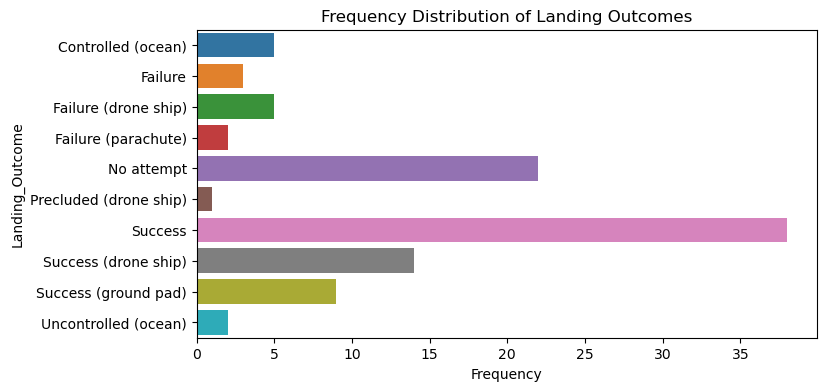

In [116]:
df = landing_outcome_distribution.DataFrame()
plt.figure(figsize=(8,4))
plt.title("Frequency Distribution of Landing Outcomes")
plot = sns.barplot(y='Landing_Outcome',x='Frequency', data=df)

### Reference Links
Hands-on Lab : String Patterns, Sorting and Grouping
Hands-on Lab: Built-in functions
Hands-on Lab : Sub-queries and Nested SELECT Statements
Hands-on Tutorial: Accessing Databases with SQL magic
Hands-on Lab: Analyzing a real World Data Set

### Author(s)
Lakshmi Holla
Other Contributors
Rav Ahuja

### Change log
2021-07-09	0.2	Lakshmi Holla	Changes made in magic sql
2021-05-20	0.1	Lakshmi Holla	Created Initial Version

© IBM Corporation 2021. All rights reserved.